# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. These are the column names with their description;

- PatientId - Identification of a patient
- AppointmentID - Identification of each appointment
- Gender - Male or Female
- AppointmentDay - The day of the actuall appointment, when they have to visit the doctor.
- ScheduledDay - The day someone called or registered the appointment, this is before   appointment of course.
- Age - How old is the patient.
- Neighbourhood - The location of the hospital.
- Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program (True of False).
- Hipertension - Boolean
- Diabetes - Boolean
- Alcoholism - Boolean
- Handcap - Boolean
- SMS_received - 1 or more messages sent to the patient (Boolean)
- No-show- Boolean.


### Question(s) for Analysis

- Do patients with special ailments show up more?
- Do younger patients show up compared to older patients?
- If a patient recieves an sms, is he likey to show up?
- Do females show up more than males?


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [24]:
# Read data from csv and print the first five rows
df = pd.read_csv('medical_appointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Get more information about the columns
df.info() #There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the summary above, there are no null values but some inconsistencies were noticed in the datatypes:
- The PatientId column should be int,
- The boolean columns(scholarship,hipertension,diabetes, alcoholism,handicap,sms_received) were saved as int (it does not pose any problem).
- The No-show column should be an int(to represent 0 or 1)

In [26]:
# Compute Statistics such as mean, percentiles etc
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [27]:
df.query("Age == 115")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [28]:
dup = df.duplicated(subset=["PatientId", "AppointmentDay"])
df[dup]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110505,5.667344e+13,5758455,F,2016-06-01T10:45:50Z,2016-06-01T00:00:00Z,55,MARIA ORTIZ,0,0,0,0,0,0,No
110507,4.769462e+14,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
110510,2.362182e+13,5757587,F,2016-06-01T09:35:48Z,2016-06-01T00:00:00Z,64,SOLON BORGES,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No


#### I noticed the max age is 115 so, it got me curious to observe the data and noticed that there are duplicate appointment days (8719 rows).
- These duplicate appointment days were scheduled by the same patient and some were on the same day with the appointment date displaying few seconds apart. I believe it might be an error while scheduling an appointment.
#### The Handicap column has 4 as a max value which is a boolean column and should have onlu have 0's and 1's.
#### The Age column has a -1 as a min value. I believe this is recorded as an infant aged below one year.
#### The patientId and AppointmentID columns will be removed as they are not needed for analyzing the dataset.

In [29]:
# Get the dimensions
df.shape

(110527, 14)


### Data Cleaning

In [30]:
# Change the column type from float to int
df['PatientId'] = df['PatientId'].astype(int)

In [31]:
# This column should be boolean. Here, I am replacing No with 0 and Yes with 1
df['No-show'] = df['No-show'].replace({'No': 0, 'Yes': 1})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [32]:
# for consistency, I renamed these columns
df.rename(columns={"SMS_received": "SmsReceived", "No-show": "NoShow"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [7]:
df.rename(columns={"SMS_received": "SmsReceived", "No-show": "NoShow"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [34]:
# remove duplicate appointments
df.drop_duplicates(subset=["PatientId", "AppointmentDay"], inplace=True)
df.shape


(101808, 14)

In [35]:
# The duplicate appointment has been removed
df.query("Age == 115")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow
63912,31963211613981,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,1
68127,31963211613981,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,1
76284,31963211613981,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,0
97666,748234579244724,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,0


In [36]:
# remove these columns as they are irrelevant to analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [37]:
def drop_handicap_outlier(value):
    for x in value:
        dfl = df[df.Handcap == x].index
        df.drop(dfl, inplace=True)

In [38]:
# remove extra values since the column is boolean and should contain only 1 and 0
values = (2,3,4)
drop_handicap_outlier(values)

In [39]:
# check distinct elements in the column
df.Handcap.unique()

array([0, 1])

#### Observations are;
- Generally, more people showed up for their appointments. 
- Most of the patients are children. 
- Very few patient had other diseases and disability but still show up regardless.
- Location could have been provided to determine if accessilibilty was an issue.

<a id='eda'></a>
## Exploratory Data Analysis


### Do patients with special ailments show up more?
From the dataset, there is information about patient with special conditions such as diabetes, hipertnsion etc. My analysis is to check if these patients attend their scheduled appointment more than patients with no such conditions.

>Note: 0 - No, 1 - Yes

In [41]:
def visualize_data(ailment):
    df[ailment].value_counts(normalize=True).plot.bar()
    plt.xlabel(ailment)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {ailment}")

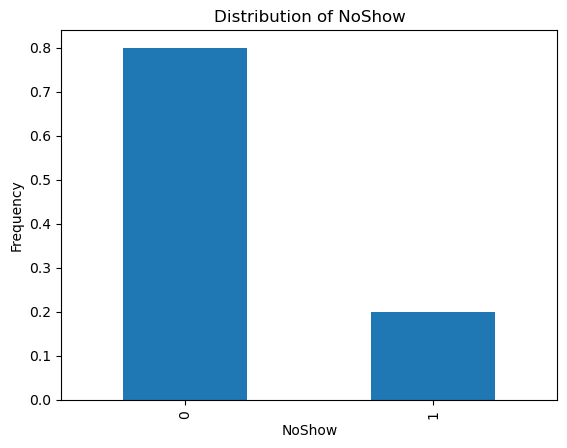

In [43]:
visualize_data("NoShow")

In [ ]:
df["Diabetes"].value_counts(normalize=True).plot.bar()

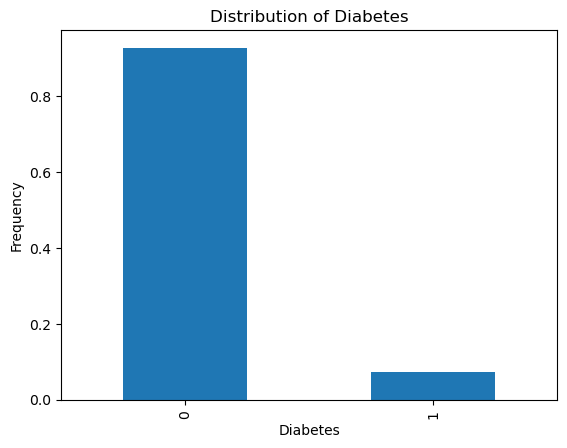

In [44]:
visualize_data("Diabetes")

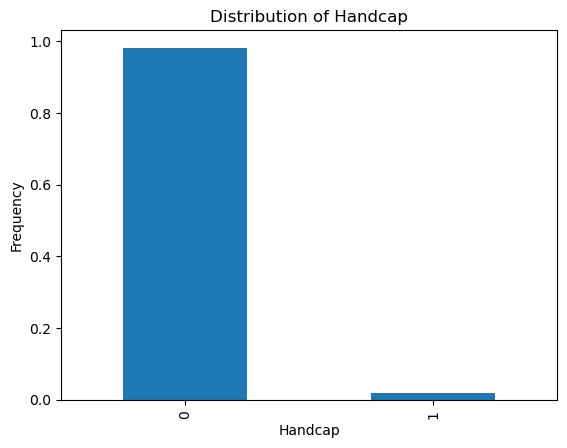

In [45]:
visualize_data("Handcap")

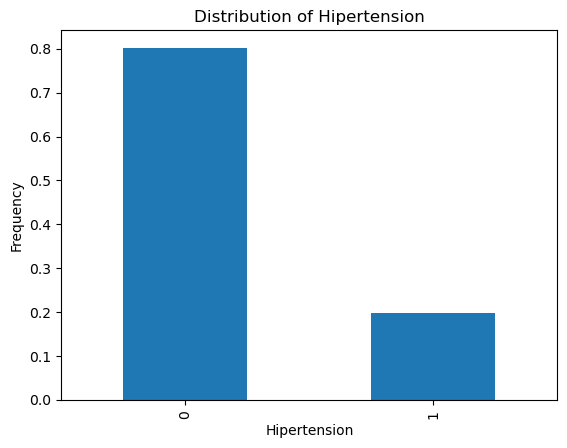

In [46]:
visualize_data("Hipertension")

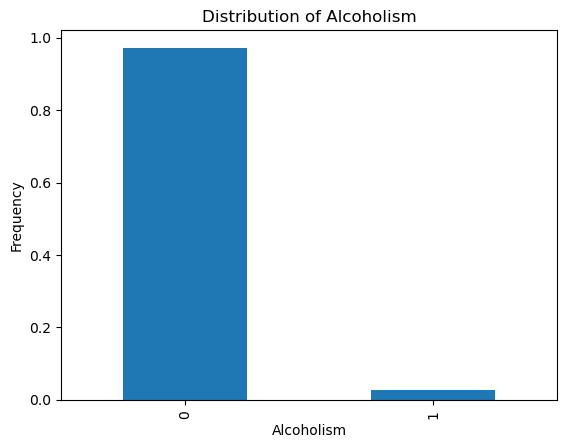

In [47]:
visualize_data("Alcoholism")

#### Generally, more patients attended their appointments. I believe the assumption of patients not showing up was because of the duplicate appointment dates.

For the visualize_data function, I am checking to see the data distribution of each special ailment.From the bar chart, there are lesser patients with these special ailments.

In [48]:
def visualize_data_relation(x_var):
    plt.figure(figsize=(8,5))
    sns.barplot(x=x_var,y="NoShow",data=df, palette='rainbow')

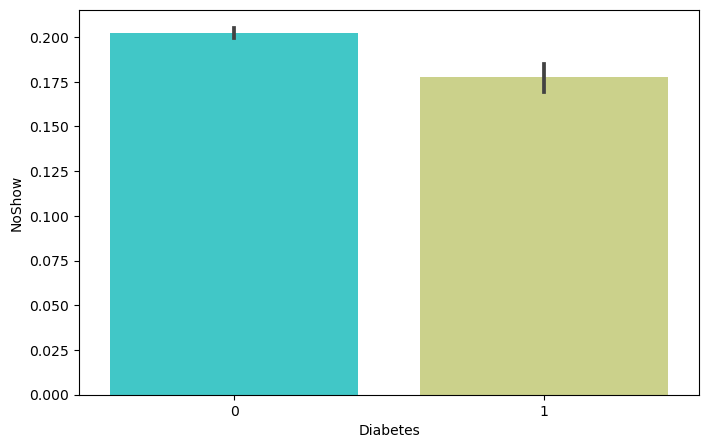

In [49]:
visualize_data_relation("Diabetes")

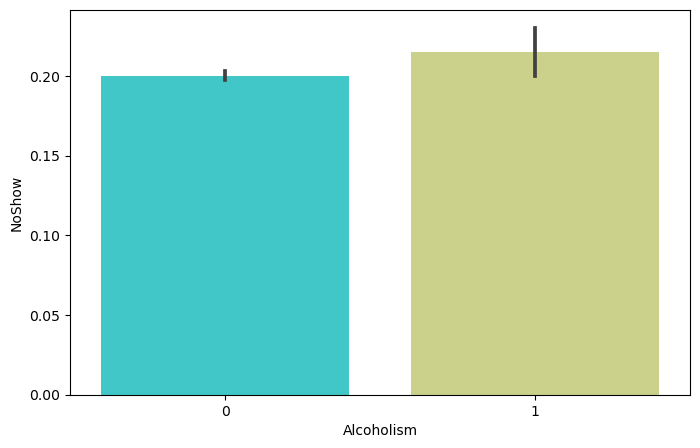

In [50]:
visualize_data_relation("Alcoholism")

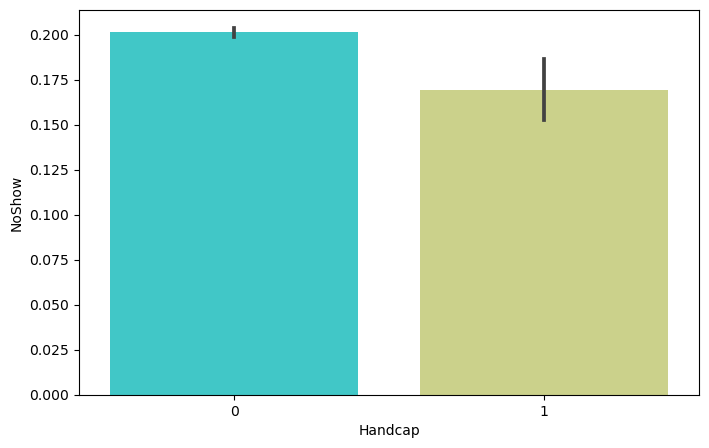

In [51]:
visualize_data_relation("Handcap")

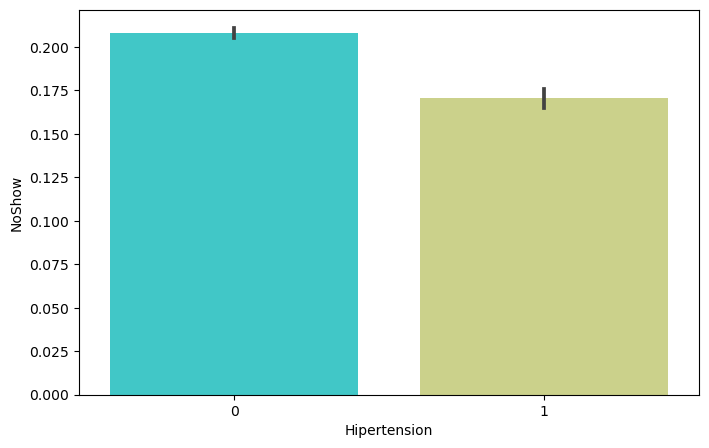

In [52]:
visualize_data_relation("Hipertension")

#### From the visualize_data_relation function, I compared the distribution of each    ailment with the data of those that attended their appointments or not.
The following was noticed:
- With patients diagnosed of alcholism,more of them attended their appointment.
- With other ailment such as diabetes, hipertension and Handcap, patients showed up less for their appointment.

### Do younger patients show up compared to older patients?

In [53]:
# Get a count of unique rows for age groups
show = df.NoShow == 0 # attended appointment
noshow = df.NoShow == 1 # did not attend appointment
df.Age.value_counts().sort_index()

-1         1
 0      3352
 1      2161
 2      1533
 3      1416
        ... 
 98        5
 99        1
 100       3
 102       2
 115       4
Name: Age, Length: 104, dtype: int64

In [54]:
# Get a count of unique rows for age groups that didn't attend their appointment
df.Age[noshow].value_counts().sort_index()

0      600
1      391
2      232
3      252
4      264
      ... 
95       6
96       1
97       2
98       1
115      2
Name: Age, Length: 100, dtype: int64

In [55]:
# Get a count of unique rows for age groups that attended their appointment
df.Age[show].value_counts().sort_index()

-1         1
 0      2752
 1      1770
 2      1301
 3      1164
        ... 
 98        4
 99        1
 100       3
 102       2
 115       2
Name: Age, Length: 104, dtype: int64

<AxesSubplot:ylabel='Frequency'>

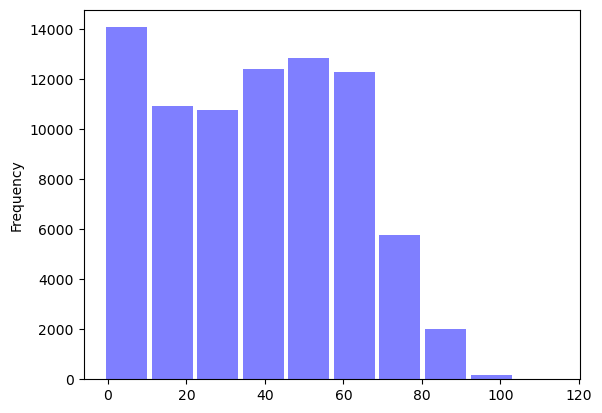

In [56]:
df.Age[show].plot(kind='hist', alpha=0.5, color='blue',rwidth=0.9, label='Appointment')

#### From the chart above, younger patients within the age group of 0-10 years attended their appointment mostly. Patients older than 90years attended the least, this can be due to the age mortality rate.

<AxesSubplot:ylabel='Frequency'>

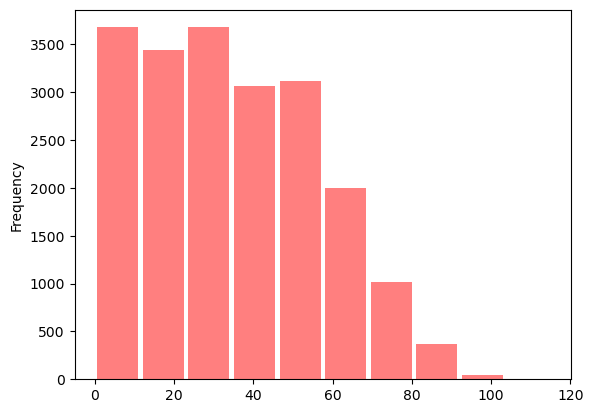

In [57]:
df.Age[noshow].plot(kind='hist', alpha=0.5, color='red', rwidth=0.9, label='No Appointment')

#### From the chart above, patients within the age group of 0-10 and 25-35 years attended their appointment mostly.

### If a patient recieves an sms, is he likey to show up?

In [58]:
df.SmsReceived[noshow].value_counts()

0    11046
1     9341
Name: SmsReceived, dtype: int64

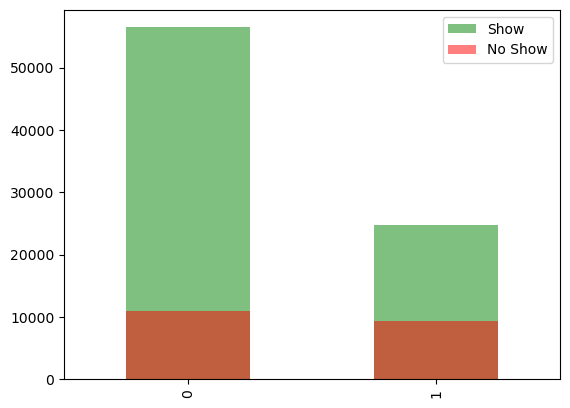

In [59]:
df.SmsReceived[show].value_counts().plot(kind='bar', alpha=0.5, color='green', label='Show')
df.SmsReceived[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No Show')
plt.legend()

Irrespective of whether an sms was received, patients still attended their appointment.¶

### Do females show up more then males? 

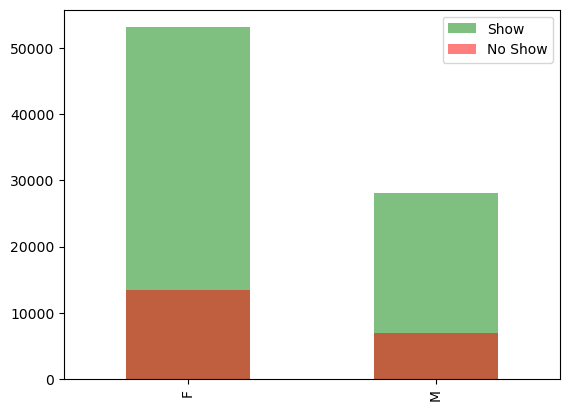

In [60]:
df.Gender[show].value_counts().plot(kind='bar', alpha=0.5, color='green', label='Show')
df.Gender[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No Show')
plt.legend()

#### From the chart, more females attended their appointment compared to males.

<a id='conclusions'></a>
## Conclusions

The following were deduced from the analysis;
- More patients attended their appointment regardless of special ailments, whether an SMS was recieved or not.
- Younger ones attended their appointment more, probably because they need more care and are more prone to sickeness due to their tender age.
- More Females attended their appointment than males. This maybe because females are more concerned about their health than males who can be carefree most times.
> A limitation in the analysis is, if the location of the patient was provided to determine whether distance to the hospital is a factor to consider.
